The zip file from kaggle contains three types of data sets (small, medium and large, with 5, 32 and 180 million transactions respectively). As we do not have that much computer power we decided to focus on the small one. 

In [282]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager
import seaborn as sns
import networkx as nx
import numpy as np

In [283]:
# load CSV
#csv_file = "/Users/masha/Desktop/master/2_trim/networks/final project/data/IBM_data/HI-Small_Trans.csv"  # path
#parquet_file = "HI-Small_Trans.parquet"  # new file name

# read csv
#df = pd.read_csv(csv_file)

# dowload in parquet format
#df.to_parquet(parquet_file, engine="pyarrow", index=False)

#print(f"Archivo convertido y guardado como {parquet_file}")


In [284]:
df=pl.read_parquet('/Users/masha/Desktop/master/2_trim/networks/IBM_dataset/HI-Small_Trans.parquet')

In [285]:
df.head()

Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
str,i64,str,i64,str,f64,str,f64,str,str,i64
"""2022/09/01 00:20""",10,"""8000EBD30""",10,"""8000EBD30""",3697.34,"""US Dollar""",3697.34,"""US Dollar""","""Reinvestment""",0
"""2022/09/01 00:20""",3208,"""8000F4580""",1,"""8000F5340""",0.01,"""US Dollar""",0.01,"""US Dollar""","""Cheque""",0
"""2022/09/01 00:00""",3209,"""8000F4670""",3209,"""8000F4670""",14675.57,"""US Dollar""",14675.57,"""US Dollar""","""Reinvestment""",0
"""2022/09/01 00:02""",12,"""8000F5030""",12,"""8000F5030""",2806.97,"""US Dollar""",2806.97,"""US Dollar""","""Reinvestment""",0
"""2022/09/01 00:06""",10,"""8000F5200""",10,"""8000F5200""",36682.97,"""US Dollar""",36682.97,"""US Dollar""","""Reinvestment""",0


In [286]:
df=df.rename({"Account": "Source Account","Account.1": "Destination Account"})
df.head()

Timestamp,From Bank,Source Account,To Bank,Destination Account,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
str,i64,str,i64,str,f64,str,f64,str,str,i64
"""2022/09/01 00:20""",10,"""8000EBD30""",10,"""8000EBD30""",3697.34,"""US Dollar""",3697.34,"""US Dollar""","""Reinvestment""",0
"""2022/09/01 00:20""",3208,"""8000F4580""",1,"""8000F5340""",0.01,"""US Dollar""",0.01,"""US Dollar""","""Cheque""",0
"""2022/09/01 00:00""",3209,"""8000F4670""",3209,"""8000F4670""",14675.57,"""US Dollar""",14675.57,"""US Dollar""","""Reinvestment""",0
"""2022/09/01 00:02""",12,"""8000F5030""",12,"""8000F5030""",2806.97,"""US Dollar""",2806.97,"""US Dollar""","""Reinvestment""",0
"""2022/09/01 00:06""",10,"""8000F5200""",10,"""8000F5200""",36682.97,"""US Dollar""",36682.97,"""US Dollar""","""Reinvestment""",0


In [287]:
# Convert 'Timestamp' column to datetime in Polars
df = df.with_columns(
    pl.col("Timestamp").str.to_datetime(format="%Y/%m/%d %H:%M", strict=False)
)

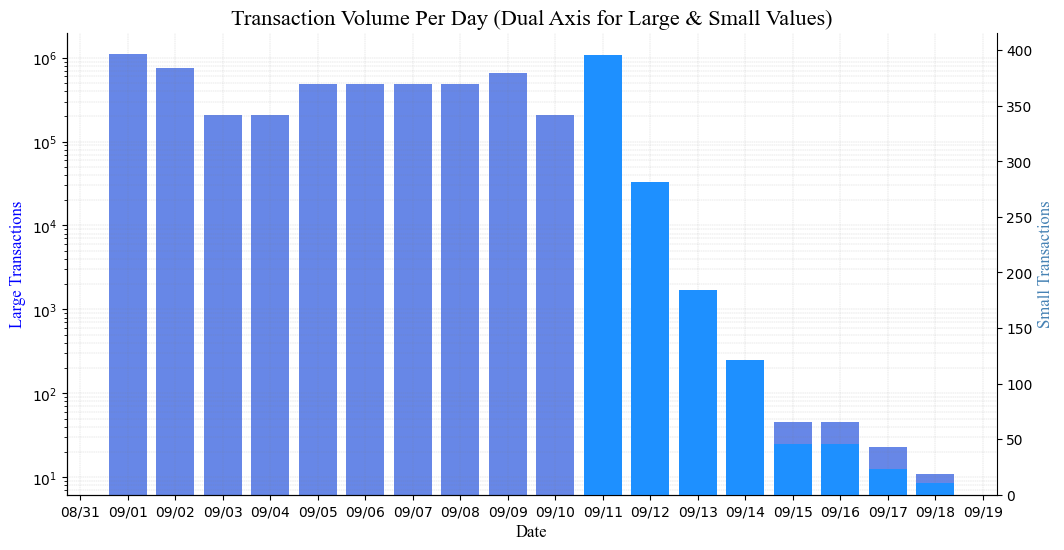

In [288]:
daily_transactions = (
    df.group_by(pl.col("Timestamp").dt.truncate("1d"))
    .agg(pl.len().alias("Transaction Count"))
    .sort("Timestamp")  # Ensure chronological order
)

ig, ax1 = plt.subplots(figsize=(12, 6))
df_pd = daily_transactions.to_pandas()

# large transactions axis (left)
ax1.bar(df_pd["Timestamp"], df_pd["Transaction Count"], color="royalblue", alpha=0.8)
ax1.set_ylabel("Large Transactions", color="blue", fontsize=12, fontname="Times New Roman")
ax1.set_yscale("log")  
#grid lines
ax1.grid(which="both", linestyle="--", linewidth=0.3, color="gray", alpha=0.4)

# small transactions axis (right)
ax2 = ax1.twinx()
ax2.set_facecolor("#FFF5E1") 
small_transactions = df_pd[df_pd["Transaction Count"] < 500] 
ax2.bar(small_transactions["Timestamp"], small_transactions["Transaction Count"], color="dodgerblue", alpha=1)
ax2.set_ylabel("Small Transactions", color="steelblue", fontsize=12, fontname="Times New Roman")

ax1.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d")) 
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))

plt.title("Transaction Volume Per Day (Dual Axis for Large & Small Values)", fontsize=16, fontname="Times New Roman")
ax1.set_xlabel("Date", fontsize=12, fontname="Times New Roman")  
plt.xticks(rotation=0, fontsize=10, fontname="Times New Roman")  

ax1.spines["top"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
plt.show()


In [289]:
import polars as pl

# Aggregate transaction count per day
daily_transactions = (
    df.group_by(pl.col("Timestamp").dt.truncate("1d"))
    .agg(pl.len().alias("Transaction Count"))
    .sort("Timestamp")
)

# Get min and max transaction volumes per day
min_volume = daily_transactions["Transaction Count"].min()
max_volume = daily_transactions["Transaction Count"].max()

print(f"Minimum Transactions in a Day: {min_volume}")
print(f"Maximum Transactions in a Day: {max_volume}")


Minimum Transactions in a Day: 11
Maximum Transactions in a Day: 1114921


In [290]:
def check_missing_values(df):
    missing = df.null_count()
    print("Missing values per column:")
    print(missing)

# Currency usage distribution
def plot_currency_distribution(df):
    currency_counts = df["Payment Currency"].value_counts()
    
    col_names = currency_counts.columns
    currency_col = col_names[0]  
    count_col = col_names[1] 

    currencies = currency_counts[currency_col].to_list()
    counts = currency_counts[count_col].to_list()

    plt.figure(figsize=(8, 5))
    plt.bar(currencies, counts, color="royalblue", alpha=0.7)
    plt.xticks(rotation=45)
    plt.xlabel("Currency")
    plt.ylabel("Number of Transactions")
    plt.title("Distribution of Payment Currencies")
    plt.show()


def plot_laundering_distribution(df):
    laundering_counts = df["Is Laundering"].value_counts()
    
    col_names = laundering_counts.columns
    label_col = col_names[0] 
    count_col = col_names[1]
    
    labels = ["Non-Laundering", "Laundering"]
    sizes = laundering_counts[count_col].to_list()

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=["red","royalblue" ], startangle=140)
    plt.title("Proportion of Laundering Transactions")
    plt.show()


Missing values per column:
shape: (1, 11)
┌───────────┬───────────┬─────────┬─────────┬───┬────────┬──────────┬─────────┬───────────────┐
│ Timestamp ┆ From Bank ┆ Source  ┆ To Bank ┆ … ┆ Amount ┆ Payment  ┆ Payment ┆ Is Laundering │
│ ---       ┆ ---       ┆ Account ┆ ---     ┆   ┆ Paid   ┆ Currency ┆ Format  ┆ ---           │
│ u32       ┆ u32       ┆ ---     ┆ u32     ┆   ┆ ---    ┆ ---      ┆ ---     ┆ u32           │
│           ┆           ┆ u32     ┆         ┆   ┆ u32    ┆ u32      ┆ u32     ┆               │
╞═══════════╪═══════════╪═════════╪═════════╪═══╪════════╪══════════╪═════════╪═══════════════╡
│ 0         ┆ 0         ┆ 0       ┆ 0       ┆ … ┆ 0      ┆ 0        ┆ 0       ┆ 0             │
└───────────┴───────────┴─────────┴─────────┴───┴────────┴──────────┴─────────┴───────────────┘


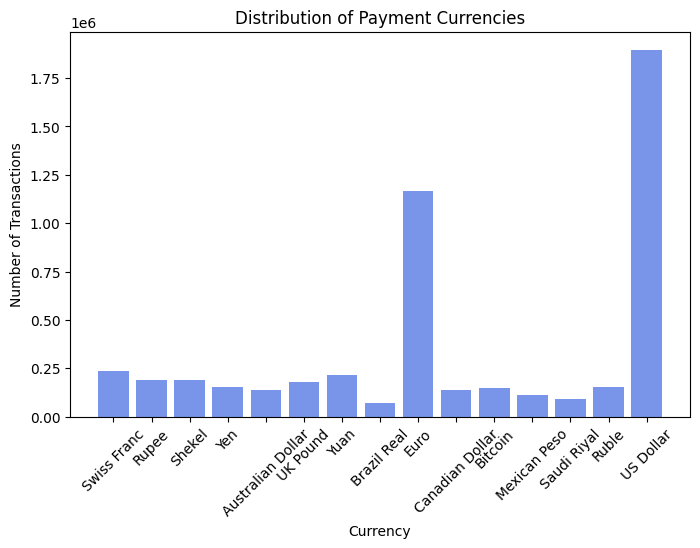

In [291]:
# EDA functions
check_missing_values(df)
plot_currency_distribution(df)

ACH stands for Automated Clearing House. It is an electronic network used for processing transactions in the United States.

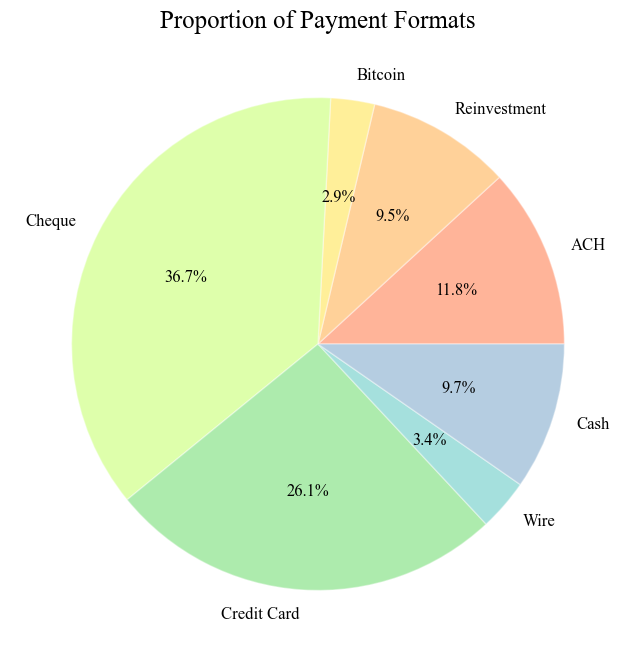

In [292]:
df_grouped = df.group_by("Payment Format").agg(pl.len().alias("Transaction Count"))
df_pd = df_grouped.to_pandas()
colors = ["#FF4500", "#FF8C00", "#FFD700", "#ADFF2F", "#32CD32", "#20B2AA", "#4682B4"]

plt.figure(figsize=(8, 8))
plt.pie(
    df_pd["Transaction Count"],
    labels=df_pd["Payment Format"],
    autopct="%1.1f%%",
    colors=colors,
    wedgeprops={"edgecolor": "white", "linewidth": 1, "alpha": 0.4},
    textprops={"fontname": "Times New Roman", "fontsize": 12},
)
plt.title("Proportion of Payment Formats", fontsize=18, fontname='Times New Roman')
plt.show()

In [293]:

def plot_transaction_amounts_per_currency(df):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df["Payment Currency"], y=np.log1p(df["Amount Paid"]), palette="pastel")
    plt.xlabel("Payment Currency")
    plt.ylabel("Log(Amount Paid)")
    plt.title("Transaction Amounts by Currency")
    plt.xticks(rotation=45)
    plt.show()

def plot_top_suspicious_accounts(df, top_n=10):
    sender_counts = df["Source Account"].value_counts().head(top_n)
    
    plt.figure(figsize=(8, 5))
    plt.barh(sender_counts["Source Account"].to_list(), sender_counts["count"].to_list(), color="lightcoral")
    plt.xlabel("Number of Transactions")
    plt.ylabel("Account")
    plt.title(f"Top {top_n} Most Active Sending Accounts")
    plt.gca().invert_yaxis()
    plt.show()

def plot_unique_counterparties(df, top_n=10):
    # Count unique recipients per sender account
    unique_recipients = df.group_by("Source Account").agg(pl.col("Destination Account").n_unique().alias("Unique Recipients"))

    # Get the top accounts with the most unique recipients
    top_senders = unique_recipients.sort("Unique Recipients", descending=True).head(top_n)

    plt.figure(figsize=(8, 5))
    plt.barh(top_senders["Source Account"].to_list(), top_senders["Unique Recipients"].to_list(), color="mediumslateblue")
    plt.xlabel("Unique Counterparties")
    plt.ylabel("Account")
    plt.title(f"Top {top_n} Accounts by Number of Unique Recipients")
    plt.gca().invert_yaxis()
    plt.show()


def compare_laundering_vs_non(df):
    # Convert "Is Laundering" from numeric to categorical labels
    df = df.with_columns(
        pl.when(pl.col("Is Laundering") == 1)
        .then(pl.lit("Laundering"))
        .otherwise(pl.lit("Non-Laundering"))
        .alias("Laundering Label")
    )

    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df["Laundering Label"], y=np.log1p(df["Amount Paid"]), palette=["lightblue", "salmon"])
    plt.xlabel("Transaction Type")
    plt.ylabel("Log(Amount Paid)")
    plt.title("Comparison of Laundering vs. Non-Laundering Transaction Amounts")
    plt.show()


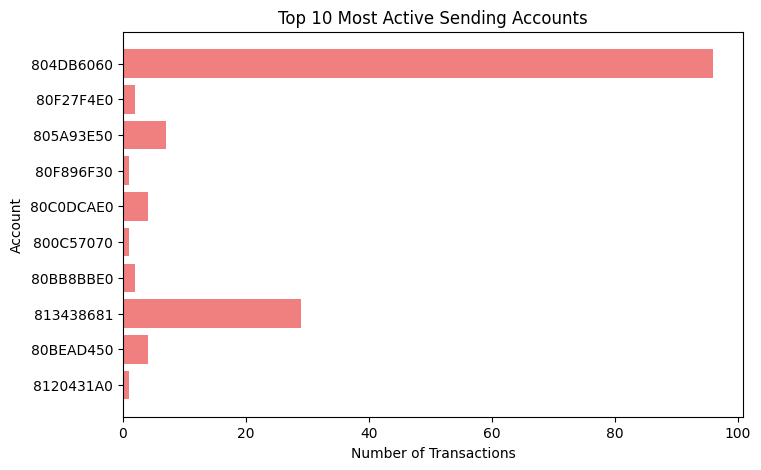

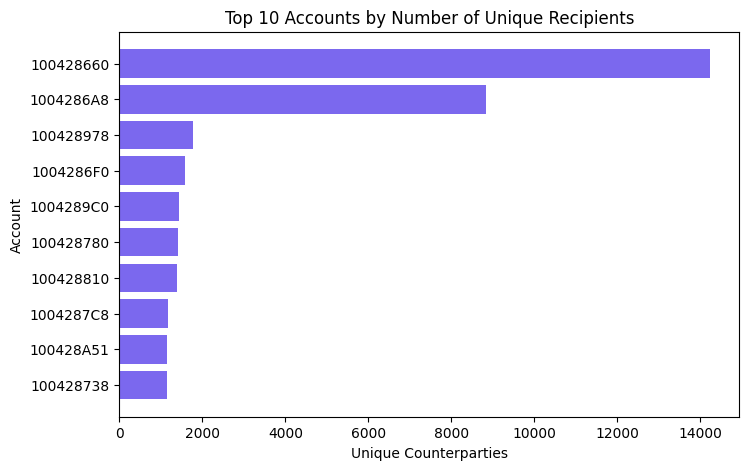

In [294]:
plot_top_suspicious_accounts(df, top_n=10)
plot_unique_counterparties(df, top_n=10)

In [295]:
# Això és només per comparar amb els gràfics si realment el volum de les transaccions te a veure amb el money laundering. 
# Per el number of unique recipients si que podem detectar alguna cosa
print(df.filter(pl.col("Is Laundering") == 1))

shape: (5_177, 11)
┌────────────┬───────────┬───────────┬─────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Timestamp  ┆ From Bank ┆ Source    ┆ To Bank ┆ … ┆ Amount    ┆ Payment   ┆ Payment   ┆ Is Launde │
│ ---        ┆ ---       ┆ Account   ┆ ---     ┆   ┆ Paid      ┆ Currency  ┆ Format    ┆ ring      │
│ datetime[μ ┆ i64       ┆ ---       ┆ i64     ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│ s]         ┆           ┆ str       ┆         ┆   ┆ f64       ┆ str       ┆ str       ┆ i64       │
╞════════════╪═══════════╪═══════════╪═════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 2022-09-01 ┆ 70        ┆ 100428660 ┆ 1124    ┆ … ┆ 389769.39 ┆ US Dollar ┆ Cheque    ┆ 1         │
│ 00:21:00   ┆           ┆           ┆         ┆   ┆           ┆           ┆           ┆           │
│ 2022-09-01 ┆ 70        ┆ 100428660 ┆ 11474   ┆ … ┆ 29024.33  ┆ US Dollar ┆ Credit    ┆ 1         │
│ 00:03:00   ┆           ┆           ┆         ┆   ┆           ┆        

/Users/masha/Desktop/master/2_trim/networks/networks_final_project/networks/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


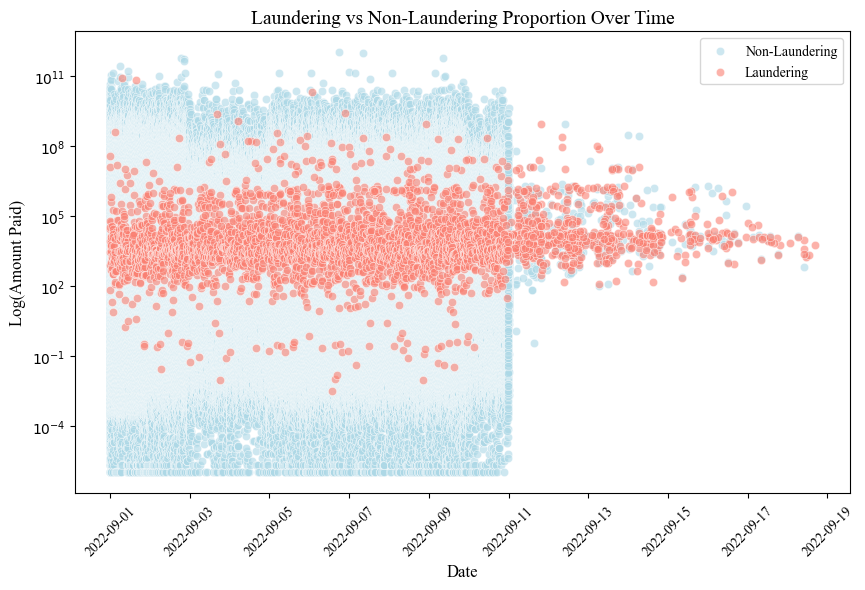

In [296]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Filter data for laundering and non-laundering transactions
non_laundering_df = df.filter(pl.col("Is Laundering") == 0)
laundering_df = df.filter(pl.col("Is Laundering") == 1)

# Convert Polars DataFrame to Pandas DataFrame
non_laundering_pd = non_laundering_df.to_pandas()
laundering_pd = laundering_df.to_pandas()

# Scatter plot for Amount Paid vs Timestamp for both types of transactions
plt.figure(figsize=(10, 6))

# Scatter plot for Non-Laundering Transactions
sns.scatterplot(data=non_laundering_pd, x="Timestamp", y="Amount Paid", color="lightblue", label="Non-Laundering", alpha=0.6)

# Scatter plot for Laundering Transactions
sns.scatterplot(data=laundering_pd, x="Timestamp", y="Amount Paid", color="salmon", label="Laundering", alpha=0.6)

plt.yscale('log')  # Use a log scale for the y-axis
plt.xlabel("Date", fontsize=12, fontname="Times New Roman")
plt.ylabel("Log(Amount Paid)", fontsize=12, fontname="Times New Roman")
plt.title("Laundering vs Non-Laundering Proportion Over Time", fontsize=14, fontname="Times New Roman")

# Fix for legend font
plt.legend(fontsize=10, prop=font_manager.FontProperties(family="Times New Roman"))

plt.xticks(rotation=45, fontsize=10, fontname="Times New Roman")
plt.show()
